# Assignment 2: Linear Regression
## Hannah Mencer

## Predictors: number of convenience stores, distance to nearest mrt, and house age
## Response: house price of unit area

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv('real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.shape

(414, 8)

In [4]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [5]:
df.sample(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
38,39,2012.667,3.1,577.96150,6,24.97201,121.54722,47.7
308,309,2013.417,16.4,289.32480,5,24.98203,121.54348,53.0
17,18,2012.750,17.7,350.85150,1,24.97544,121.53119,37.4
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
341,342,2013.000,13.0,750.07040,2,24.97371,121.54951,37.0
112,113,2013.417,9.9,2102.42700,3,24.96044,121.51462,23.1
199,200,2013.417,18.2,451.64190,8,24.96945,121.54490,31.6
286,287,2012.917,5.9,90.45606,9,24.97433,121.54310,56.3
371,372,2013.500,4.1,312.89630,5,24.95591,121.53956,51.7
181,182,2013.167,11.6,201.89390,8,24.98489,121.54121,55.9


In [6]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

There are no missing values, so we do not need to do anything to fill them.

# Outliers

<AxesSubplot:xlabel='X1 transaction date'>

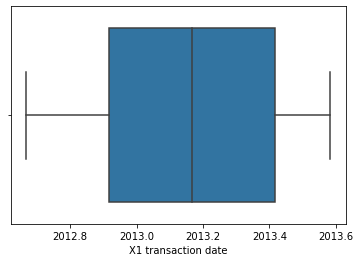

In [7]:
sns.boxplot(x='X1 transaction date',data=df)

There are no outliers, so we do not need to do anything.

<AxesSubplot:xlabel='X2 house age'>

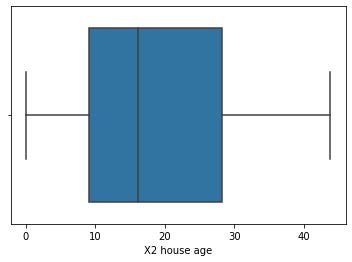

In [8]:
sns.boxplot(x='X2 house age',data=df)

There are no outliers, so we do not need to do anything.

<AxesSubplot:xlabel='X3 distance to the nearest MRT station'>

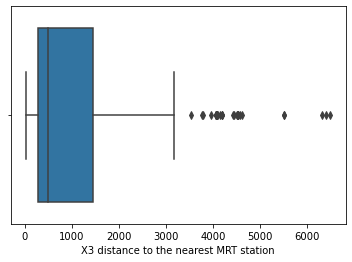

In [9]:
sns.boxplot(x='X3 distance to the nearest MRT station',data=df)

In [10]:
df.sort_values('X3 distance to the nearest MRT station',ascending=False).head(50)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
347,348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2
116,117,2013.000,30.9,6396.283,1,24.94375,121.47883,12.2
249,250,2012.833,18.0,6306.153,1,24.95743,121.47516,15.0
255,256,2013.417,31.5,5512.038,1,24.95095,121.48458,17.4
8,9,2013.500,31.7,5512.038,1,24.95095,121.48458,18.8
48,49,2013.417,24.2,4605.749,0,24.94684,121.49578,13.4
176,177,2012.833,13.9,4573.779,0,24.94867,121.49507,19.2
170,171,2013.333,24.0,4527.687,0,24.94741,121.49628,14.4
30,31,2013.500,25.9,4519.690,0,24.94826,121.49587,22.1
331,332,2013.333,25.6,4519.690,0,24.94826,121.49587,15.6


<AxesSubplot:ylabel='Density'>

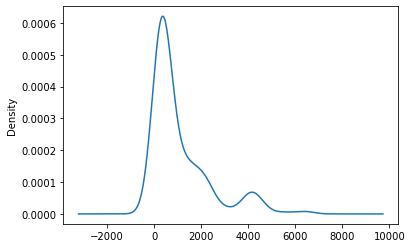

In [11]:
df['X3 distance to the nearest MRT station'].plot.density()

There are many outliers on the max side, and they are part of a right skew distribution. The distances do not seem to be entered incorrectly, and they don't have a substantially large gap from the rest of the values. Therefore, we should not drop any of the values.

<AxesSubplot:xlabel='X4 number of convenience stores'>

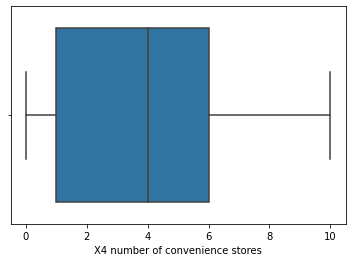

In [12]:
sns.boxplot(x='X4 number of convenience stores',data=df)

There are no outliers, so we do not need to do anything.

<AxesSubplot:xlabel='X5 latitude'>

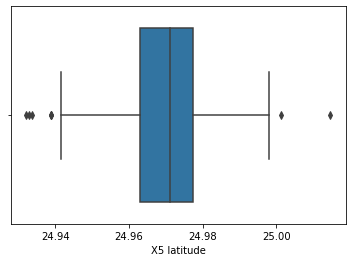

In [13]:
sns.boxplot(x='X5 latitude',data=df)

<AxesSubplot:ylabel='Density'>

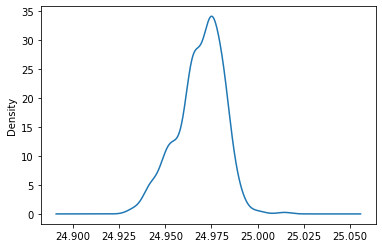

In [14]:
df['X5 latitude'].plot.density()

In [15]:
df.sort_values('X5 latitude',ascending=False).head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
35,36,2013.500,13.9,4079.418,0,25.01459,121.51816,27.3
228,229,2013.417,11.9,3171.329,0,25.00115,121.51776,46.6
344,345,2013.500,34.6,3085.170,0,24.99800,121.51550,41.2
178,179,2013.500,13.1,1144.436,4,24.99176,121.53456,36.7
296,297,2012.750,12.5,1144.436,4,24.99176,121.53456,34.1


In [16]:
df.sort_values('X5 latitude').head(25)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
382,383,2013.000,16.3,3529.564,0,24.93207,121.51597,29.3
148,149,2013.500,16.4,3780.590,0,24.93293,121.51203,45.1
194,195,2013.500,15.2,3771.895,0,24.93363,121.51158,29.3
320,321,2012.750,13.5,4197.349,0,24.93885,121.50383,18.6
117,118,2013.000,13.6,4197.349,0,24.93885,121.50383,13.0
329,330,2013.000,13.6,4197.349,0,24.93885,121.50383,19.2
183,184,2013.500,17.0,4082.015,0,24.94155,121.50381,18.8
298,299,2013.333,16.7,4082.015,0,24.94155,121.50381,16.7
40,41,2013.000,13.6,4082.015,0,24.94155,121.50381,15.9
155,156,2013.167,13.8,4082.015,0,24.94155,121.50381,15.6


There are some outliers on both the min and the max side. After checking the values, they appear to be correct. They are not much more or less than other values within the IRQ. They also do not appear to have been entered incorrectly. Therefore, we will keep them.

<AxesSubplot:xlabel='X6 longitude'>

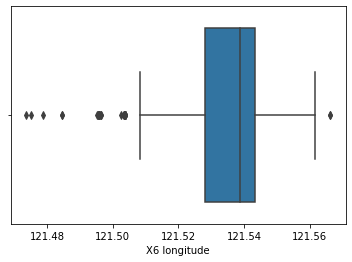

In [17]:
sns.boxplot(x='X6 longitude',data=df)

<AxesSubplot:ylabel='Density'>

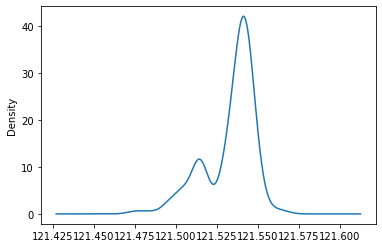

In [18]:
df['X6 longitude'].plot.density()

In [19]:
df.sort_values('X6 longitude',ascending=False).head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
307,308,2012.833,10.3,3079.890,0,24.95460,121.56627,24.7
187,188,2013.000,8.9,3078.176,0,24.95464,121.56627,22.0
184,185,2012.750,14.1,2615.465,0,24.95495,121.56174,21.8
407,408,2013.000,5.2,2408.993,0,24.95505,121.55964,22.3
359,360,2013.500,5.6,2408.993,0,24.95505,121.55964,24.7


In [20]:
df.sort_values('X6 longitude').head(25)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
347,348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2
249,250,2012.833,18.0,6306.153,1,24.95743,121.47516,15.0
116,117,2013.000,30.9,6396.283,1,24.94375,121.47883,12.2
255,256,2013.417,31.5,5512.038,1,24.95095,121.48458,17.4
8,9,2013.500,31.7,5512.038,1,24.95095,121.48458,18.8
176,177,2012.833,13.9,4573.779,0,24.94867,121.49507,19.2
49,50,2012.667,29.4,4510.359,1,24.94925,121.49542,13.2
58,59,2013.500,30.3,4510.359,1,24.94925,121.49542,22.6
48,49,2013.417,24.2,4605.749,0,24.94684,121.49578,13.4
232,233,2012.917,27.1,4412.765,1,24.95032,121.49587,17.4


There are some outliers on both the min and max side for X6 longitude. After checking the values, they do not appear to have been entered incorrectly. They are not far off from other values either. Therefore, we will keep the outlier values.

<AxesSubplot:xlabel='Y house price of unit area'>

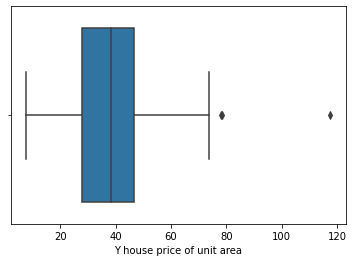

In [21]:
sns.boxplot(x='Y house price of unit area',data=df)

In [22]:
df.sort_values('Y house price of unit area',ascending=False).head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
270,271,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
220,221,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
312,313,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0
166,167,2013.417,0.0,292.9978,6,24.97744,121.54458,73.6
105,106,2012.833,0.0,292.9978,6,24.97744,121.54458,71.0


The values are reasonable and likely not entered incorrectly as one house could be considerably more valubale than others. Also, 117.5 thousand is not too high of a price for it to be considered an error, and therefore, we will not be getting rid of any of the outliers.

# Scale and Transform

In [23]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


age, distance, lat, long, price

<AxesSubplot:>

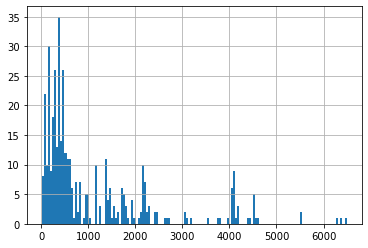

In [55]:
df['X3 distance to the nearest MRT station'].hist(bins=150)


<AxesSubplot:>

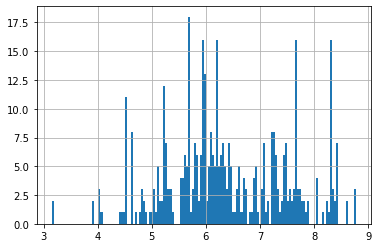

In [60]:
from sklearn import preprocessing as prep
import numpy as np

df['X3_distance_transformed'] = df['X3 distance to the nearest MRT station'].apply(np.log)
df['X3_distance_transformed'].hist(bins=150)

<AxesSubplot:>

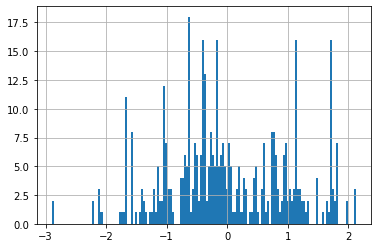

In [61]:
df['X3_distance_transformed_scaled'] = prep.scale(df['X3_distance_transformed'])
df['X3_distance_transformed_scaled'].hist(bins=150)

<AxesSubplot:ylabel='Density'>

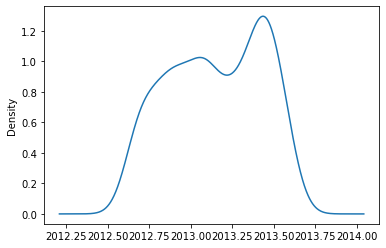

In [24]:
#not sure if this is continuous

df['X1 transaction date'].plot.density()

<AxesSubplot:ylabel='Density'>

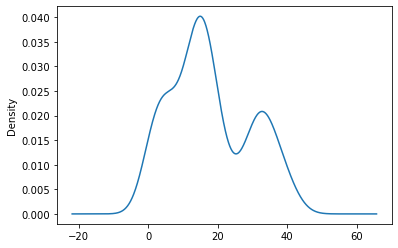

In [25]:
df['X2 house age'].plot.density()

There are no large values that would dominate the data, and the distribution is fairly normal. Therefore, we do not need to scale or transform this column.

<AxesSubplot:ylabel='Density'>

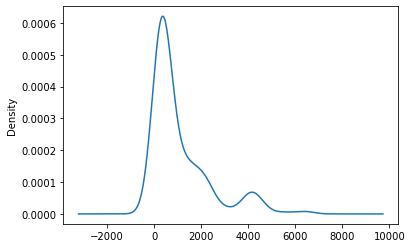

In [26]:
df['X3 distance to the nearest MRT station'].plot.density()

The data contains no large values that would dominate the data, but there is a right skew. Therefore, we do not need to scale the data, but we do need to transform it.

<AxesSubplot:>

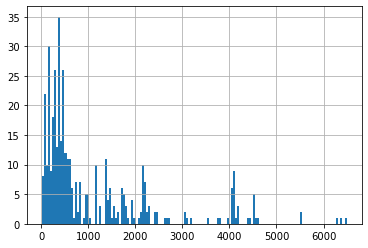

In [27]:
df['X3 distance to the nearest MRT station'].hist(bins=150)

<AxesSubplot:ylabel='Density'>

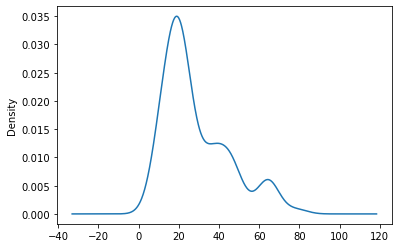

In [28]:
# Square Root transformation
df['X3_sqrt']=df['X3 distance to the nearest MRT station'].apply(lambda x:np.sqrt(x))
df['X3_sqrt'].plot.density()

<AxesSubplot:ylabel='Density'>

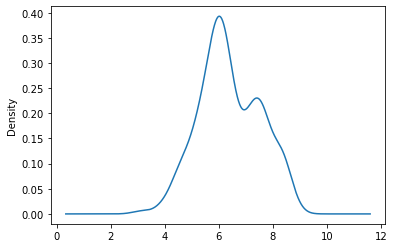

In [29]:
# Log transformation
df['X3_log']=df['X3 distance to the nearest MRT station'].apply(lambda x:np.log(x))
df['X3_log'].plot.density()

The logarithmic transformation gives us a faily normal distribution, so that is the one we will stick with for X3.

<AxesSubplot:ylabel='Density'>

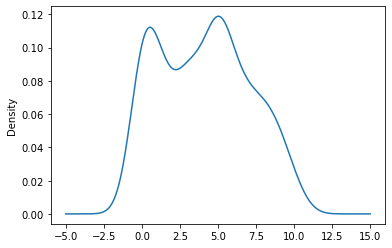

In [30]:
df['X4 number of convenience stores'].plot.density() # DISCRETE?

<AxesSubplot:ylabel='Density'>

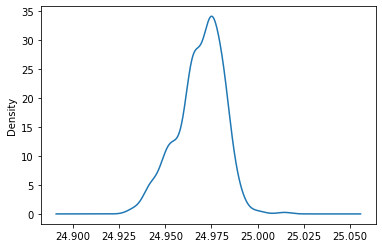

In [31]:
df['X5 latitude'].plot.density()

There are no large values to dominate the data, and there is a fairly normal distribution. Therefore, scaling and transforming is not necessary here.

<AxesSubplot:ylabel='Density'>

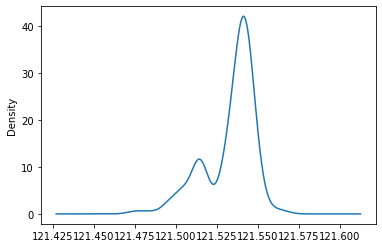

In [32]:
df['X6 longitude'].plot.density()

<AxesSubplot:>

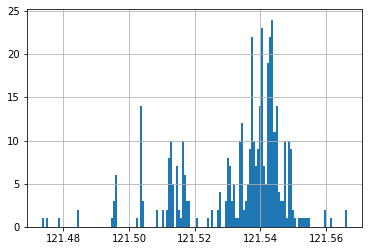

In [33]:
df['X6 longitude'].hist(bins=150)

The data contains no large values, but it has a slight left skew. Therefore, we do not need to scale the data, but we should transform it. ??

<AxesSubplot:ylabel='Density'>

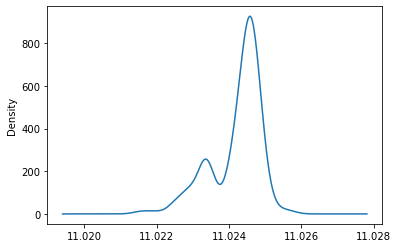

In [34]:
# Square Root transformation
df['X6_sqrt']=df['X6 longitude'].apply(lambda x:np.sqrt(x))
df['X6_sqrt'].plot.density()

<AxesSubplot:ylabel='Density'>

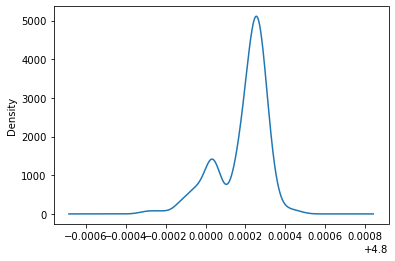

In [35]:
# Square Root transformation
df['X6_log']=df['X6 longitude'].apply(lambda x:np.log(x))
df['X6_log'].plot.density()

<AxesSubplot:ylabel='Density'>

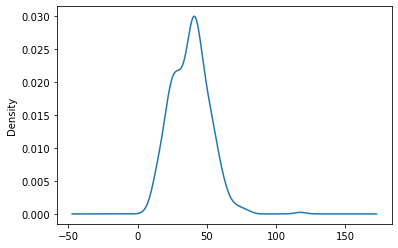

In [36]:
df['Y house price of unit area'].plot.density()

<AxesSubplot:>

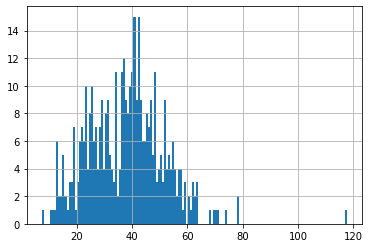

In [37]:
df['Y house price of unit area'].hist(bins=150)

The data has

<AxesSubplot:ylabel='Density'>

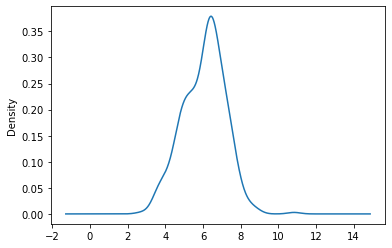

In [38]:
# Square Root transformation
df['Y_sqrt']=df['Y house price of unit area'].apply(lambda x:np.sqrt(x))
df['Y_sqrt'].plot.density()

# Dummy Variables

???

# Defining Features

In [62]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X3_sqrt,X3_log,X6_sqrt,X6_log,Y_sqrt,X3_distance_scaled,X3_distance_transformed,X3_distance_transformed_scaled
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,9.212970,4.441225,11.024529,4.800245,6.156298,-0.792495,4.441225,-1.744066
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,17.509846,5.725527,11.024496,4.800239,6.496153,-0.616612,5.725527,-0.595682
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,23.706212,6.331474,11.024695,4.800276,6.877500,-0.414015,6.331474,-0.053862
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,23.706212,6.331474,11.024695,4.800276,7.402702,-0.414015,6.331474,-0.053862
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,19.762803,5.967603,11.024629,4.800264,6.565059,-0.549997,5.967603,-0.379225


In [63]:
X=df[['X2 house age','X3_distance_transformed_scaled','X4 number of convenience stores']]
Y=df[['Y house price of unit area']]

# Split Data

In [64]:
# Now we can split our data into a training and test set.  In this example, we are using an 80/20 split, 
# where 80% of our data will be used for training our model, and 20% of our data will be used for testing.

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# Train Model

In [65]:
# Now we train our LinearRegression model using the training subset of data.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the Model

In [66]:
#r2
r = model.score(X_test, y_test)

#adjusted r2
adj_r=1-(1-r)*(len(df)-1)/(len(df)-X.shape[1]-1)

#RMSE
y_predict = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_predict, y_test))

print("R-square: ", r)
print("Adjusted R-square ",adj_r)
print("RMSE: ", rmse)

R-square:  0.6752865770173868
Adjusted R-square  0.6729106251419044
RMSE:  7.020467852805154


## What it means

414

# Trying other parameters

In [44]:
def lin_reg(X,Y):
    # Now we can split our data into a training and test set.  In this example, we are using an 80/20 split, 
    # where 80% of our data will be used for training our model, and 20% of our data will be used for testing.

    # Split X and y into X_
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
   
    # Now we train our LinearRegression model using the training subset of data.
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    #evaluating the model
    r = model.score(X_test, y_test)

    y_predict = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_predict, y_test))

    print("R-square: ", r)
    print("RMSE: ", rmse)

In [45]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X3_sqrt,X3_log,X6_sqrt,X6_log,Y_sqrt
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,9.212970,4.441225,11.024529,4.800245,6.156298
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,17.509846,5.725527,11.024496,4.800239,6.496153
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,23.706212,6.331474,11.024695,4.800276,6.877500
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,23.706212,6.331474,11.024695,4.800276,7.402702
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,19.762803,5.967603,11.024629,4.800264,6.565059
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,63.890649,8.314346,11.022877,4.799946,3.924283
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,9.510839,4.504864,11.024659,4.800269,7.071068
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,19.772951,5.968630,11.024512,4.800242,6.371813
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,10.237680,4.652150,11.024549,4.800249,7.245688


In [46]:
# Model 1
X=df[['X2 house age','X4 number of convenience stores']]
Y=df[['Y house price of unit area']]

lin_reg(X,Y)

R-square:  0.44916401473147294
RMSE:  9.143807747589593


this is generally worse than the first (less predictors)

In [47]:
# Model 2

In [48]:
X=df[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores',
     'X5 latitude','X6 longitude']]
Y=df[['Y house price of unit area']]

lin_reg(X,Y)

R-square:  0.7007314553053474
RMSE:  6.739791630652558


In [49]:
# Model 3

In [50]:
X=df[['X5 latitude','X6 longitude']]
Y=df[['Y house price of unit area']]

lin_reg(X,Y)

R-square:  0.551255318449535
RMSE:  8.253071190460252


In [51]:
X=df[['X3 distance to the nearest MRT station','X4 number of convenience stores']]
Y=df[['Y house price of unit area']]

lin_reg(X,Y)

R-square:  0.5931902071032947
RMSE:  7.857992926802703


In [ ]:
# Polynomial regression
 